**1**. (50 points)

Write separate `toolz` pipelines to generate the following variables

- words: a list of all the words in the files `fortune?.txt` in the `data` directory
- reverse_index: a reverse index of words (key=position, value=word)
- index: an index of words (key=word, value=position)
- cat: a list containing the categorical encoding of words

Finally, use `numpy` to convert `cat` into a one-hot matrix with shape (#words, #unique words)

### 1.1 word list

In [1]:
from functools import reduce, partial
import itertools as it
import operator as op
import toolz as tz
import toolz.curried as c
import string
import re
import numpy as np
import os
import glob

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, IndexLocator
import random

In [2]:
paths = glob.glob(os.path.join('data', '*.txt') )
paths.sort()

In [3]:
paths

['data/fortune0.txt',
 'data/fortune1.txt',
 'data/fortune2.txt',
 'data/fortune3.txt',
 'data/fortune4.txt',
 'data/fortune5.txt',
 'data/fortune6.txt']

In [4]:
word_list = tz.pipe(
    paths,
    c.map(partial(open)),
    c.map(lambda x: x.read()),
    c.map(lambda x: x.lower()),
    c.map(lambda x: x.translate(str.maketrans('', '', string.punctuation))),
    c.mapcat(lambda x: x.split()),
    list
)

### 1.2 reverse_index

In [13]:
reverse_index=tz.pipe(
    list(np.array(word_list)[np.sort(np.unique(word_list, return_index=True)[1])]),
    lambda x: zip(list(range(len(x))),x),
    lambda x: dict(x)
)

In [14]:
reverse_index

{0: 'the',
 1: 'fortune',
 2: 'you',
 3: 'seek',
 4: 'is',
 5: 'in',
 6: 'another',
 7: 'cookie',
 8: 'a',
 9: 'closed',
 10: 'mouth',
 11: 'gathers',
 12: 'no',
 13: 'feet',
 14: 'conclusion',
 15: 'simply',
 16: 'place',
 17: 'where',
 18: 'got',
 19: 'tired',
 20: 'of',
 21: 'thinking',
 22: 'cynic',
 23: 'only',
 24: 'frustrated',
 25: 'optimist',
 26: 'foolish',
 27: 'man',
 28: 'listens',
 29: 'to',
 30: 'his',
 31: 'heart',
 32: 'wise',
 33: 'cookies',
 34: 'will',
 35: 'die',
 36: 'alone',
 37: 'and',
 38: 'poorly',
 39: 'dressed',
 40: 'fanatic',
 41: 'one',
 42: 'who',
 43: 'cant',
 44: 'change',
 45: 'mind',
 46: 'wont',
 47: 'subject',
 48: 'if',
 49: 'look',
 50: 'back',
 51: 'you’ll',
 52: 'soon',
 53: 'be',
 54: 'going',
 55: 'that',
 56: 'way',
 57: 'live',
 58: 'long',
 59: 'enough',
 60: 'open',
 61: 'many',
 62: 'an',
 63: 'alien',
 64: 'some',
 65: 'sort',
 66: 'appearing',
 67: 'shortly',
 68: 'do',
 69: 'not',
 70: 'mistake',
 71: 'temptation',
 72: 'for',
 73: 'o

### 1.3 index

In [6]:
unique_word_list=list(np.array(word_list)[np.sort(np.unique(word_list, return_index=True)[1])])

In [15]:
index=tz.pipe(
    unique_word_list,
    lambda x: zip(x,list(range(len(x)))),
    lambda x: dict(x)
)

In [16]:
index

{'117': 230,
 '12': 221,
 '15': 222,
 '23': 223,
 '28': 224,
 '37': 225,
 'a': 8,
 'abort': 151,
 'about': 162,
 'actions': 133,
 'again': 119,
 'alien': 63,
 'all': 175,
 'alone': 36,
 'always': 127,
 'am': 156,
 'an': 62,
 'and': 37,
 'another': 6,
 'appearing': 66,
 'appointment': 142,
 'are': 147,
 'as': 194,
 'ask': 226,
 'at': 80,
 'avalanche': 203,
 'avoid': 215,
 'back': 50,
 'be': 53,
 'because': 137,
 'behave': 143,
 'being': 157,
 'best': 168,
 'but': 106,
 'calories': 231,
 'can': 126,
 'cant': 43,
 'carbon': 211,
 'change': 44,
 'chicken': 190,
 'chinese': 197,
 'closed': 9,
 'cold': 144,
 'conclusion': 14,
 'contain': 205,
 'contains': 229,
 'cookie': 7,
 'cookies': 33,
 'could': 99,
 'cynic': 22,
 'danger': 98,
 'day': 180,
 'die': 35,
 'dirt': 90,
 'disregard': 174,
 'do': 68,
 'doesnt': 112,
 'doesn’t': 241,
 'don’t': 103,
 'dream': 94,
 'dressed': 39,
 'eat': 249,
 'enough': 59,
 'especially': 165,
 'except': 183,
 'factory': 160,
 'fanatic': 40,
 'far': 76,
 'feels':

### 1.4 cat

In [17]:
cat=tz.pipe(
    word_list,
    c.map(lambda word: index[word]),
    list,
    lambda x: np.array(x)
    )

In [18]:
cat

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,   8,  14,   4,  15,   0,  16,  17,   2,  18,  19,  20,  21,
         8,  22,   4,  23,   8,  24,  25,   8,  26,  27,  28,  29,  30,
        31,   8,  32,  27,  28,  29,  33,   2,  34,  35,  36,  37,  38,
        39,   8,  40,   4,  41,  42,  43,  44,  30,  45,  37,  46,  44,
         0,  47,  48,   2,  49,  50,  51,  52,  53,  54,  55,  56,   2,
        34,  57,  58,  59,  29,  60,  61,   1,  33,  62,  63,  20,  64,
        65,  34,  53,  66,  29,   2,  67,  68,  69,  70,  71,  72,  73,
        74,  34,  75,  76,  77,  78,  42,  79,  80,  81,  82,  83,  84,
        20,  85,  29,  86,  80,  78,  42,  79,  87,   4,  88,  80,   2,
        78,  42,  89,  90,   4,  91,  92,  64,  93,  94,  20,  95,  96,
        94,  20,  33,   0,  97,  98,  99,  53, 100, 101, 102, 103, 104,
         0, 105, 106, 107,   8,   7,   0, 108, 109,  53, 100, 110, 106,
       111, 112, 113, 114, 115, 116, 117,   2,  34,  53, 118, 11

In [20]:
n = len(cat)
p = len(index)
m = np.zeros((n,p), dtype='int')
i = np.arange(len(cat))
m[i, cat] = 1
m

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

**2**. (50 points)

Write a simulation of diffusion-limited aggregation. In this simulation, we have $n$ random walkers. Each walker starts from row 0 and a random column number, and in each step, the walker increases the row number by 1 and randomly increments or decrements its column number by 1. If the column number of the walker exceeds the maximum or becomes negative, the walker emerges on the other side (toroidal boundary conditions). At any time, if any of the walkers 8 neighbors is non-zero, the walker stops in that position, and the number of steps taken is recorded in that (row, column).

Write a function `dla(nwalkers, width, height, seed)` that returns a matrix with shape (width, height) after running `nwalkers` random walks as described above. The argument `ssed` is used to initialize a random number seed. Internally, the function should create a (width, height+1) matrix, and initialize the last row to have 1 with all other entries 0.

Feel free to use loops. This function is not easily vectorized.

Plot the returned matrix for the arguments `nwalkers=10000, width=300, height=150, seed=123`. It should look like this:

![dla](figs/dla.png)

In [56]:
def stop1(i,j,space,width):
    '''Check if the current walker should stop'''
    if (j<(width-1)) & (j>0):
        res=(space[i][j-1]+space[i][j+1]+space[i+1][j+1]+
             space[i+1][j]+space[i+1][j-1]+
             space[i-1][j+1]+space[i-1][j]+space[i-1][j-1])
    if j==(width-1):
        res=space[(i-1):(i+3),(width-2):(width)].sum()+space[(i-1):(i+3),0].sum()-space[i,(width-1)]
    if j==0:
        res=space[(i-1):(i+3),0:2].sum()+space[(i-1):(i+3),(width-1)].sum()-space[i,0]
    return res

In [59]:
def dla(nwalkers, width, height, seed):
    '''Generate the random walk matrix'''
    space=np.zeros((height+1)*width).reshape((height+1),width)
    space[(height+1)]=1
    random.seed(seed)
    for peo in range(nwalkers):
        n_step=0
        step=round(np.random.uniform(0,width))
        for i in range(1,height):
            n_step=n_step+1
            step=step+np.random.choice([-1,1])
            if step>(width-1):
                step=step-width
            if step<0:
                step=width+step
            temp = stop1(i, step, space,width)
            if temp>0:
                space[i,step]=n_step
                break 
    return(space)

In [62]:
result=dla(nwalkers=10000, width=300, height=150, seed=123)

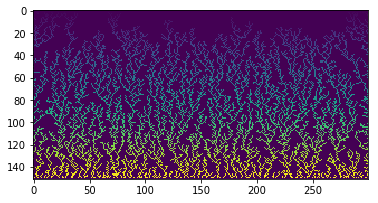

In [63]:
plt.imshow(result)